<a href="https://colab.research.google.com/github/Ibitoye-Oyinloye/E_news_Express_Project/blob/main/E_news_Express_Project(Ibitoye).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

An online news portal aims to expand its business by acquiring new subscribers. Every visitor to the website takes certain actions based on their interest. The company plans to analyze these interests and wants to determine whether a new feature will be effective or not. Companies often analyze users' responses to two variants of a product to decide which of the two variants is more effective. This experimental technique is known as a/b testing that is used to determine whether a new feature attracts users based on a chosen metric.

Suppose you are hired as a Data Scientist in E-news Express. The design team of the company has created a new landing page. You have been assigned the task to decide whether the new landing page is more effective to gather new subscribers. Suppose you randomly selected 100 users and divided them equally into two groups. The old landing page is served to the first group (control group) and the new landing page is served to the second group (treatment group). Various data about the customers in both groups are collected in 'abtest.csv'. Perform the statistical analysis to answer the following questions using the collected data.

1. Explore the dataset and extract insights using Exploratory Data Analysis.

2. Do the users spend more time on the new landing page than the existing landing page?

3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

4. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

5. Is the time spent on the new page same for the different language users?


*Consider a significance level of 0.05 for all tests.

The  idea  behind  answering  these  questions  is  to  decide  whether  the  new  page  is  effective  enough  to  gather  new subscribers for the news portal. We will perform the statistical analysis on the collected data to make the business decision.


# Data Dictionary

1. user_id - This represents the user ID of the person visiting the website.

2. group - This represents whether the user belongs to the first group (control) or the second group (treatment).

3. landing_page - This represents whether the landing page is new or old.

4. time_spent_on_the_page - This represents the time (in minutes) spent by the user on the landing page.

5. converted - This represents whether the user gets converted to a subscriber of the news portal or not.

6. language_preferred - This represents the language chosen by the user to view the landing page.

## Import all the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
import io
import os
import sys

In [ ]:
df = pd.read_csv('abtest.csv')
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [ ]:
#from google.colab import drive
#drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Read file directly from mounted link
#df = pd.read_csv('/content/gdrive/MyDrive/abtest.csv')
df.sample(n=5)


,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
9,546548,control,old,2.08,no,English
84,546571,control,old,4.30,no,French
0,546592,control,old,3.48,no,Spanish
15,546466,treatment,new,6.27,yes,Spanish
8,546461,treatment,new,10.71,yes,French


### Understand the shape of the dataset

In [ ]:
df.shape

(100, 6)

- The data is 100 rows by 6 columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


There are total 100 non-null observations in each of the columns.

There are 6 columns named 'user_id', 'group', 'landing_page', 'time_spent_on_the_page', 'converted', 'language_preferred' whose data types are int64, object, object, float64, object, object respectively.

'group', 'landing_page', 'converted', and 'language_preferred' are objects, we can change them to categories.

### Convert Objects to Categories

In [ ]:
df['group'] = df['group'].astype('category')
df['landing_page'] = df['landing_page'].astype('category')
df['converted'] = df['converted'].astype('category')
df['language_preferred'] = df['language_preferred'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    int64   
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    category
 5   language_preferred      100 non-null    category
dtypes: category(4), float64(1), int64(1)
memory usage: 2.6 KB


## MIssing Values Check and Duplicates

In [ ]:
df.isnull().sum() 

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

- There are no missing values

In [ ]:
df.duplicated().any()

False

- There are no duplictes in the variables

## Statistical Analysis

In [ ]:
# let's view the statistical summary of the non-numerical columns in the data
df.describe(exclude=np.number).T.style.highlight_max(color="yellow", axis=0)

,count,unique,top,freq
group,100,2,control,50
landing_page,100,2,new,50
converted,100,2,yes,54
language_preferred,100,3,French,34


In [ ]:
# let's view the statistical summary of the numerical columns in the data
df.describe(include=np.number).T.style.highlight_max(color="yellow", axis=0)

,count,mean,std,min,25%,50%,75%,max
user_id,100.000000,546517.000000,52.295779,546443.000000,546467.750000,546492.500000,546567.250000,546592.000000
time_spent_on_the_page,100.000000,5.377800,2.378166,0.190000,3.880000,5.415000,7.022500,10.710000


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


- There are 100 unique users.
- There are 2 unique groups - control and treatment. Each group consists of 50 users.
- There are 2 landing_pages - new and old.
- Overall, 54 users get converted and 46 users do not get converted after visiting the landing page.
- French is the most preferred language
- Time spent on page averagly is 5.4

In [ ]:
# We drop UserId as it is not relevant to help us draw inferences on the population
df.drop(['user_id'],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   group                   100 non-null    category
 1   landing_page            100 non-null    category
 2   time_spent_on_the_page  100 non-null    float64 
 3   converted               100 non-null    category
 4   language_preferred      100 non-null    category
dtypes: category(4), float64(1)
memory usage: 1.8 KB


## Exploratory Data Analysis
### Univariate Analysis

In [ ]:
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='Lightgreen') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

### Observations on Time Spent on Page

C:\Users\HOME\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HOME\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


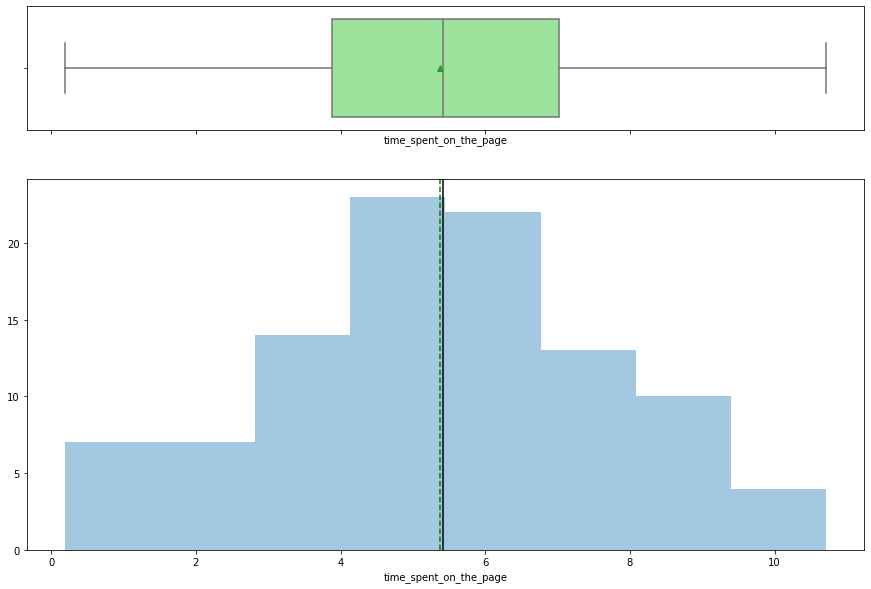

In [ ]:
histogram_boxplot(df["time_spent_on_the_page"])

- The distribution of time spent on the page is normally distributed There are no outliers in this variable.

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n].sort_values())

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()      # height of the plot

        ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")  # annotate the percentage

    plt.show()  # show the plot

### Observations on Landing page

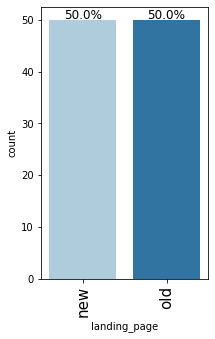

In [ ]:
labeled_barplot(df,'landing_page',perc=True)

- The distribution of observations across the two landing pages are same.

### Observation on group

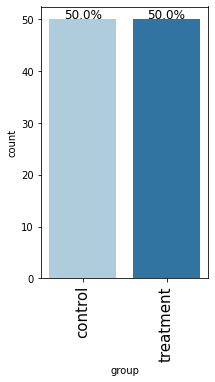

In [ ]:
labeled_barplot(df,'group',perc=True)

- The distribution of observations across groups are the same.

### Observations on language_preferred

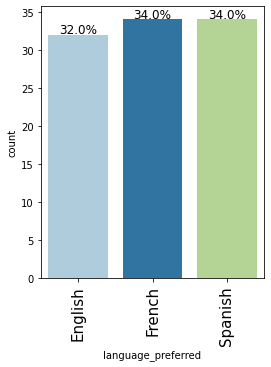

In [ ]:

labeled_barplot(df,'language_preferred',perc=True)

- English is the least language_preferred while Spanish and French have equal preference

## Bivariate Analysis

### Time Spent on Page Vs Converted

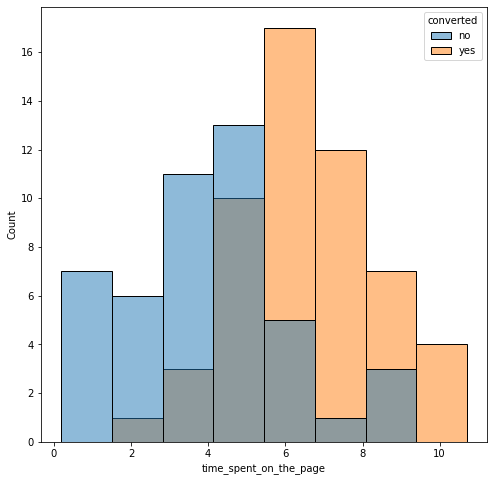

In [ ]:
plt.figure(figsize=(8,8))
sns.histplot(data = df, x = 'time_spent_on_the_page', hue = 'converted')
plt.show()

- Customers who spent 6 minutes and above got converted.


##  Does the converted status depend on the preferred language?

C:\Users\HOME\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


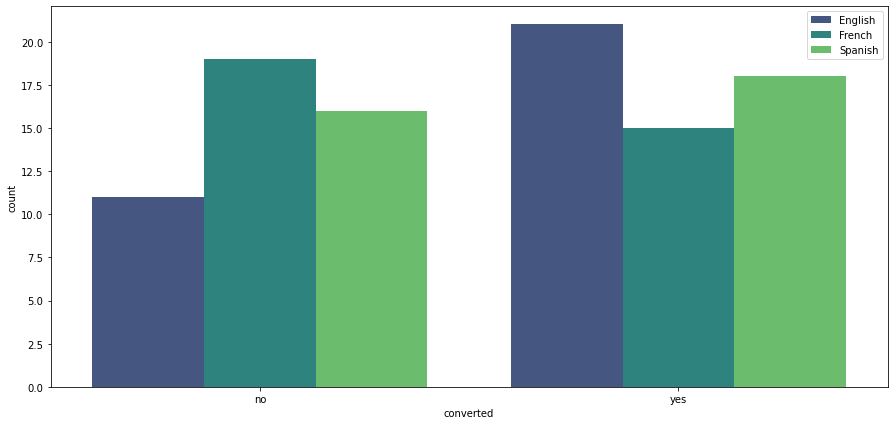

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(df["converted"],hue=df["language_preferred"],palette='viridis')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

- Customers who converted prefer English Language
- Customers who did not convert prefer French more than the other languages

## Is the mean time spent on the new page same for the different language users?

C:\Users\HOME\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


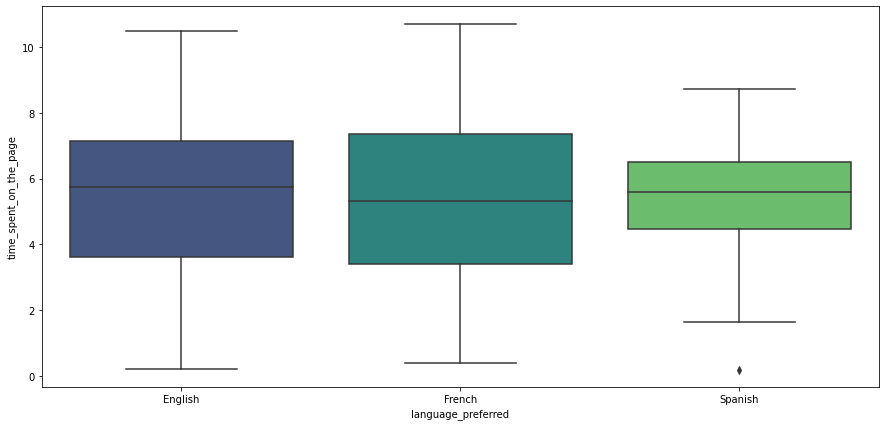

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(df["language_preferred"],df["time_spent_on_the_page"],palette="viridis")
plt.show()

- Users spent slightly more time on French as compared to English
- Spanish speaking customers spent less time on the page

## Do the users spend more time on the new landing page than the old landing page?

C:\Users\HOME\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


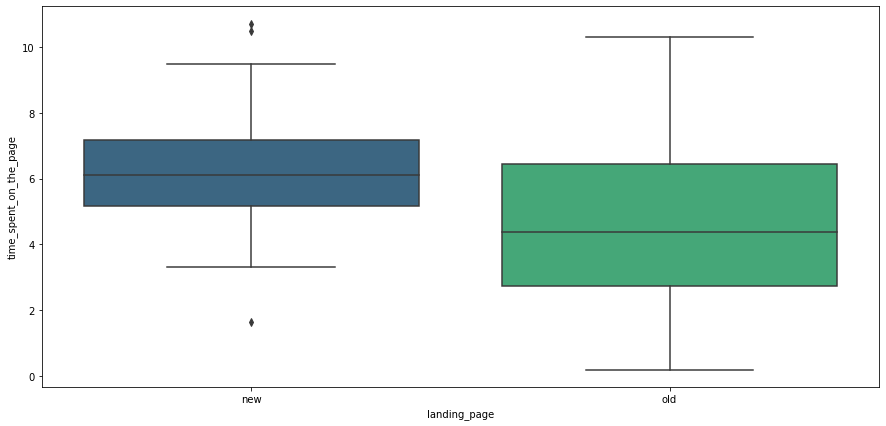

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(df["landing_page"],df["time_spent_on_the_page"],palette="viridis")
plt.show()

- people spent more times on the new page than the old age

## Step 1: Define the null and alternate hypotheses

$H_0:$ The mean time spent by the users on the new page is equal to the mean time spent by the users on the old page.

$H_a:$ The mean time spent by the users on the new page is greater than the mean time spent by the users on the old page.

Let $\mu_1$ and $\mu_2$ be the mean time spent by the users on the new and old page respectively.

Mathematically, the above formulated hypotheses can be written as:

$H_0: \mu_1 = \mu_2$

$H_a: \mu_1 > \mu_2$

## Step 2: Select Appropriate test

- This is a one-tailed test concerning two population means from two independent populations. As the population standard deviations are unknown, the two sample independent t-test will be the appropriate test for this problem.

## Step 3: Collect the Data

In [ ]:
time_spent_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']
time_spent_old = df[df['landing_page'] == 'old']['time_spent_on_the_page']

In [ ]:
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_new.std(),2))
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_old.std(),2))

The sample standard deviation of the time spent on the new page is: 1.82
The sample standard deviation of the time spent on the new page is: 2.58


## Step 4: Calculate the p-value

In [ ]:
# import the required function
from scipy.stats import ttest_ind
# find the p-value

In [ ]:
test_stat, p_value = ttest_ind(time_spent_new, time_spent_old, equal_var = False, alternative = 'greater')
print('The p-value is', p_value)

The p-value is 0.0001392381225166549


## Step 5: Compare the p-value with $\alpha$

Since the p-value is less than the 5% significance level, we reject the null hypothesis. Hence, we have enough statistical evidence to say that the mean time spent by the users on the new page is greater than the mean time spent by the users on the old page

## 3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

$H_0:$ The conversion rate for the new page is equal to the conversion rate for the old page.

$H_a:$ The conversion rate for the new page is greater than the conversion rate for the old page.

Let $p_1$ and $p_2$ be the conversion rate for the new and old page respectively.

Mathematically, the above formulated hypotheses can be written as:

$H_0: p_1 = p_2$

$H_a: p_1 > p_2$

This is a one-tailed test concerning two population proportions from two independent populations. Hence, the two proportion z-test will be the appropriate test for this problem

## Collect and prepare data

In [ ]:
new_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']
old_converted = df[df['group'] == 'control']['converted'].value_counts()['yes']
print('The numbers of converted users for the new and old pages are {0} and {1} respectively'.format(new_converted, old_converted))
n_control = df.group.value_counts()['control'] # number of users in the control group
n_treatment = df.group.value_counts()['treatment'] #number of users in the treatment group
print('The numbers of users served the new and old pages are {0} and {1} respectively'.format(n_control, n_treatment ))

The numbers of converted users for the new and old pages are 33 and 21 respectively
The numbers of users served the new and old pages are 50 and 50 respectively


### Calculate the Probability

In [ ]:
# import the required function
from statsmodels.stats.proportion import proportions_ztest

# find the p-value
test_stat, p_value = proportions_ztest([new_converted, old_converted] , [n_treatment, n_control], alternative = 'larger')
print('The p-value is', p_value)

The p-value is 0.008026308204056278


Since the p-value is less than the 5% significance level, we reject the null hypothesis. Hence, we have enough statistical evidence to say that the conversion rate for the new page is greater than the conversion rate for the old page.

## 4. Is the conversion and preferred language are independent or related?

$H_0:$ The converted status is independent of the preferred language.

$H_a:$ The converted status is not independent of the preferred language.

This is a problem of Chi-square test of independence, concerning the two independent categorical variables, converted status and preferred language.

In [ ]:
# create the contingency table showing the distribution of two categorical variables
contingency_table = pd.crosstab(df['converted'], df['language_preferred'])
contingency_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


In [ ]:
#import the required function
from scipy.stats import chi2_contingency
# use chi2_contingency() to find the p-value
chi2, p_value, dof, exp_freq = chi2_contingency(contingency_table)
# print the p-value
print('The p-value is', p_value)

The p-value is 0.21298887487543447


Since the p-value is greater than the 5% significance level, we fail to reject the null hypothesis. Hence, we do not have enough statistical evidence to say that the converted status depends on the preferred language.

## 5. Is the time spent on the new page same for the different language users?

$H_0:$ The mean times spent on the new page by English, French, and Spanish users are equal.

$H_a:$ At least one of the mean times spent on the new page by English, French, and Spanish users is unequal.

This is a problem, concerning three population means. One-way ANOVA could be the appropriate test here provided normality and equality of variance assumptions are verified.

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ Time spent on the new page follows a normal distribution

against the alternative hypothesis

>$H_a:$ Time spent on the new page does not follow a normal distribution

In [ ]:
# Checking the mean time spent on the new page for different language users
df.groupby(['language_preferred'])['time_spent_on_the_page'].mean()

language_preferred
English    5.559062
French     5.253235
Spanish    5.331765
Name: time_spent_on_the_page, dtype: float64

In [ ]:
## Assumption 1: Normality
##  import the required function
from scipy.stats import shapiro

##  find the p-value
w, p_value = shapiro(df['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.5643684267997742


Since p-value of the test is very large than the 5% significance level, we fail to reject the null hypothesis that the response follows the normal distribution.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [ ]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( df[df['language_preferred']=="English"]['time_spent_on_the_page'], 
                             df[df['language_preferred']=="French"]['time_spent_on_the_page'], 
                             df[df['language_preferred']=="Spanish"]['time_spent_on_the_page'])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.06515086840327314


Since the p-value is large than the 5% significance level, we fail to reject the null hypothesis of homogeneity of variances.

In [ ]:
time_spent_English = df[df['language_preferred']=="English"]['time_spent_on_the_page']
time_spent_French = df[df['language_preferred']=="French"]['time_spent_on_the_page']
time_spent_Spanish = df[df['language_preferred']=="Spanish"]['time_spent_on_the_page']

In [ ]:
# import the required function
from scipy.stats import f_oneway
# find the p-value
test_stat, p_value = f_oneway(time_spent_English, time_spent_French, time_spent_Spanish)
# print the p-value
print('The p-value is', p_value)

The p-value is 0.8665610536012648


As the p-value 0.8665610536012648 is greater than the level of significance, we fail to reject the null hypothesis.

## Conclusion

-Users spend more time on the new landing page than the old landing page
- More time is spent on new landing page than on the old landing page.
- More time is spent on English language in the new landing page as compared to French and Spanish
- Spanish language is the most prefered as more time is spent in the old landing page.
- Less English language is prefered in the old landing page
- Treatment group has a higher median value on time spent on the pages than control group.
- Control group has no outliers and tratment group has outliers below the minimum and above the minimum time spent on the page